<a href="https://colab.research.google.com/github/Takaros96/Support-Vector-Machines-in-Python/blob/main/Coursera_guided_projects_Support_Vector_Machines_in_Python%2C_From_Start_To_Finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#support vector machines are one of the best machine learning methods when getting
#the correct answer is a higher priority than understanding why you goet the correct answer
#they work really well with relatively small datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale#scale and center data
from sklearn.svm import SVC#this will make a support vector machine
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('/content/processed.cleveland.data')

In [ ]:
df

3.0  150.0  232.0  0.0  2.0  165.0  0.0.1  1.6  1.0 0.0.2  7.0  0
59.0 1.0  4.0  170.0  326.0  0.0  2.0  140.0    1.0  3.4  3.0   0.0  7.0  2
46.0 1.0  3.0  150.0  231.0  0.0  0.0  147.0    0.0  3.6  2.0   0.0  3.0  1
65.0 0.0  3.0  155.0  269.0  0.0  0.0  148.0    0.0  0.8  1.0   0.0  3.0  0
67.0 1.0  4.0  125.0  254.0  1.0  0.0  163.0    0.0  0.2  2.0   2.0  7.0  3
62.0 1.0  4.0  120.0  267.0  0.0  0.0   99.0    1.0  1.8  2.0   2.0  7.0  1
...       ...    ...    ...  ...  ...    ...    ...  ...  ...   ...  ... ..
45.0 1.0  1.0  110.0  264.0  0.0  0.0  132.0    0.0  1.2  2.0   0.0  7.0  1
68.0 1.0  4.0  144.0  193.0  1.0  0.0  141.0    0.0  3.4  2.0   2.0  7.0  2
57.0 1.0  4.0  130.0  131.0  0.0  0.0  115.0    1.0  1.2  2.0   1.0  7.0  3
     0.0  2.0  130.0  236.0  0.0  2.0  174.0    0.0  0.0  2.0   1.0  3.0  1
38.0 1.0  3.0  138.0  175.0  0.0  0.0  173.0    0.0  0.0  1.0     ?  3.0  0

[235 rows x 12 columns]

In [ ]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang',
            'oldpeak','slope','ca']

In [ ]:
df.dtypes#object dtypes suggests that something is going wrong.
#object datatypes are used when there are mixtures of things,like a mixture of numbers and letters

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak     object
slope       object
ca           int64
dtype: object

In [ ]:
 df['ca'].unique()

array([2, 1, 0, 3, 4])

In [ ]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
dtype: int64

In [ ]:
len(df)

235

In [ ]:
df['ca'].unique()

array([2, 1, 0, 3, 4])

In [ ]:
len(df.loc[(df['oldpeak']=='?')|(df['slope']=='?')])

6

In [ ]:
df.loc[(df['oldpeak']=='?')|(df['slope']=='?')]

,,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
df_no_missing=df.loc[(df['oldpeak']!='?')&(df['slope']!='?')]

In [ ]:
df_no_missing['oldpeak'].unique()

array(['0.0', '2.0', '1.0', '3.0'], dtype=object)

In [ ]:
df_no_missing['slope'].unique()

array(['7.0', '3.0', '6.0'], dtype=object)

In [ ]:
X=df_no_missing.drop('ca',axis=1)

In [ ]:
X

,,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0
46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0.0,3.0
65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0
67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [ ]:
y=df_no_missing['ca']

In [ ]:
y


59.0  1.0    2
46.0  1.0    1
65.0  0.0    0
67.0  1.0    3
62.0  1.0    1
            ..
57.0  0.0    1
45.0  1.0    1
68.0  1.0    2
57.0  1.0    3
      0.0    1
Name: ca, Length: 229, dtype: int64

In [ ]:
df_no_missing.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')

In [ ]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak     object
slope       object
dtype: object

In [ ]:
X['age'].unique()

array([4., 3., 2., 1.])

In [ ]:
X['age']

59.0  1.0    4.0
46.0  1.0    3.0
65.0  0.0    3.0
67.0  1.0    4.0
62.0  1.0    4.0
            ... 
57.0  0.0    4.0
45.0  1.0    1.0
68.0  1.0    4.0
57.0  1.0    4.0
      0.0    2.0
Name: age, Length: 229, dtype: float64

In [ ]:
pd.get_dummies(X,columns=['age']).head()

,,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,age_1.0,age_2.0,age_3.0,age_4.0
59.0,1.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0,0,0,0,1
46.0,1.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0.0,3.0,0,0,1,0
65.0,0.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0,0,1,0
67.0,1.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,0,0,0,1
62.0,1.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,0,0,0,1


In [ ]:
X_encoded=pd.get_dummies(X,columns=['age','chol','exang','slope'])

In [ ]:
X_encoded

,,sex,cp,restbp,fbs,restecg,thalach,oldpeak,age_1.0,age_2.0,age_3.0,age_4.0,chol_0.0,chol_1.0,chol_2.0,exang_1.0,exang_2.0,exang_3.0,slope_3.0,slope_6.0,slope_7.0
59.0,1.0,170.0,326.0,0.0,140.0,1.0,3.4,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1
46.0,1.0,150.0,231.0,0.0,147.0,0.0,3.6,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0
65.0,0.0,155.0,269.0,0.0,148.0,0.0,0.8,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0
67.0,1.0,125.0,254.0,1.0,163.0,0.0,0.2,2.0,0,0,0,1,1,0,0,0,1,0,0,0,1
62.0,1.0,120.0,267.0,0.0,99.0,1.0,1.8,2.0,0,0,0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,0,0,1,1,0,0,0,1,0,0,0,1
45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1
68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,0,0,1,1,0,0,0,1,0,0,0,1
57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
y.unique()

array([2, 1, 0, 3, 4])

In [ ]:
#since we are only making a support vector machine that does simple classification
#and only care if someone has heart disease or not,we need to convert all numbers>0 to 1

In [ ]:
y_not_zero_idx=y>0
y[y_not_zero_idx]=1
y.unique()

<ipython-input-100-e6ea860608b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_idx]=1


array([1, 0])

In [ ]:
#the radial basis function assumes that the data are centered and scaled,so we need
#to do this to both the training and testing datasets

#we split the data into training and testing datasets and then scale them seperately
#to avoid data leakage.dl occurs when info about the training dataset corrupts
#or influences the testing dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [ ]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [ ]:
#we built support vector machine for classification

In [ ]:
confusion_matrix(clf_svm,X_test_scaled,y_test,labels=['has','does not have'])#we need the updated confusion matrix

TypeError: ignored

In [ ]:
#optimizing a support vector machine is all about finding the best value for gamma,
#and potentially the regularization parameter C.since we have 2 parameters to optimize,we will use
#GridSearchCV().we do this by specifying potential values for gamma and C
#and GridSearchCV() tests all possible combinations for us

In [ ]:
param_grid=[
    {'C':[1,10,100,1000],
     'gamma':[0.001,0.0001],
     'kernel':['rbf']},
]

In [ ]:
optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=0
)

In [ ]:
optimal_params.fit(X_train_scaled,y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
#ideal value for C is 10 and for gamma 0.001

In [ ]:
clf_svm=SVC(random_state=42,C=10,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.001, random_state=42)

In [ ]:
len(df.columns)

12

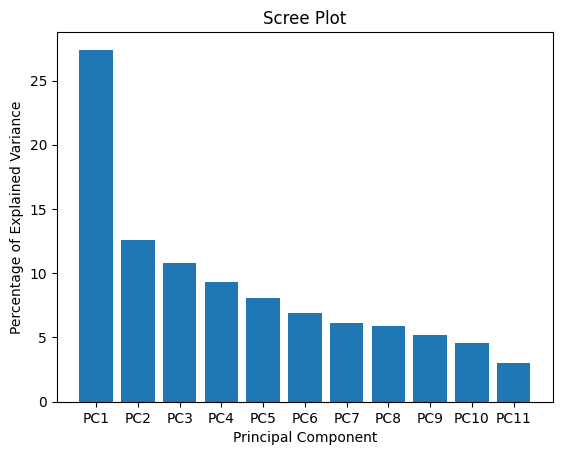

In [ ]:
pca=PCA()#by default,PCA() centers the data but does not scale
X_train_pca=pca.fit(X_train_scaled)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()